<a href="https://colab.research.google.com/github/feaviolp/msc-project/blob/main/CNN%2082-44%20percent%20with%20test%20CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import tensorflow as tf

## Load dataset and set train/validation/test split

In [13]:
# load cifar10 in predefined train / test split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# split the training data into training and validation sets
# set `random_state` to 0 to ensure the same split every time the code is ran
# 20% ie 10000 entries will be split from the training set into validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

##Convert images to greyscale (if we choose to)

In [14]:
#X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
#X_val = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_val])
#X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_test])


## Present summary and visualise some of the data

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


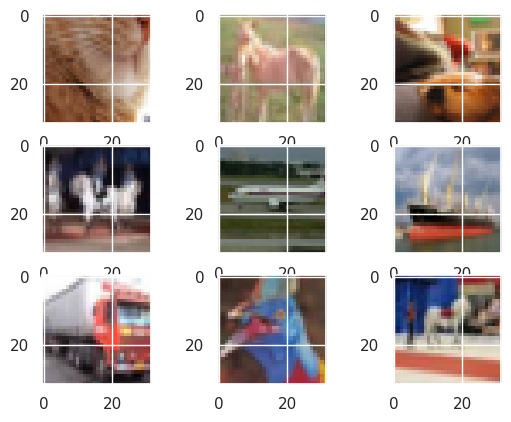

In [15]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (X_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
# pyplot.imshow(X_train[i],cmap='gray')
 pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

## normalise images by dividing by RGB scale

In [16]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_val = X_val.astype('float32') / 255

## Label preprocessing

In [17]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoder.fit(y_train)

y_train = one_hot_encoder.transform(y_train)
y_val = one_hot_encoder.transform(y_val)
y_test = one_hot_encoder.transform(y_test)

In [18]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
#  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'),
  tf.keras.layers.Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
#  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'),
  tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'),
  tf.keras.layers.Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
#  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [20]:
model.compile(loss='categorical_crossentropy',
     optimizer='adamax',
     metrics=['acc'])

In [21]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [22]:
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/50
157/157 [==============================] - 1479s 9s/step - loss: 1.9596 - acc: 0.2444 - val_loss: 1.6283 - val_acc: 0.3742
Epoch 2/50
157/157 [==============================] - 1473s 9s/step - loss: 1.4929 - acc: 0.4394 - val_loss: 1.4084 - val_acc: 0.4754
Epoch 3/50
157/157 [==============================] - 1522s 10s/step - loss: 1.2419 - acc: 0.5437 - val_loss: 1.0826 - val_acc: 0.6085
Epoch 4/50
157/157 [==============================] - 1461s 9s/step - loss: 1.0387 - acc: 0.6249 - val_loss: 0.9721 - val_acc: 0.6541
Epoch 5/50
157/157 [==============================] - 1471s 9s/step - loss: 0.9095 - acc: 0.6790 - val_loss: 0.8999 - val_acc: 0.6850
Epoch 6/50
157/157 [==============================] - 1476s 9s/step - loss: 0.7842 - acc: 0.7234 - val_loss: 0.8408 - val_acc: 0.7091
Epoch 7/50
157/157 [==============================] - 1531s 10s/step - loss: 0.6773 - acc: 0.7624 - val_loss: 0.7555 - val_acc: 0.7367
Epoch 8/50
157/157 [==============================] - 1462s 

In [23]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val)
print('Test accuracy:', test_acc)

313/313 [==============================] - 92s 294ms/step - loss: 0.8124 - acc: 0.7628
Test accuracy: 0.7627999782562256


## Plot accuracy by epochs

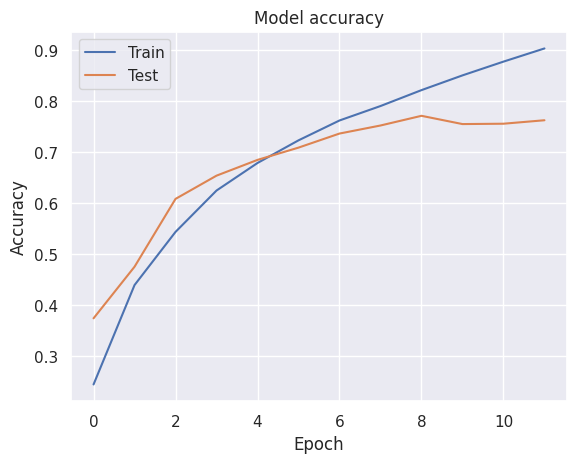

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Plot loss by epochs

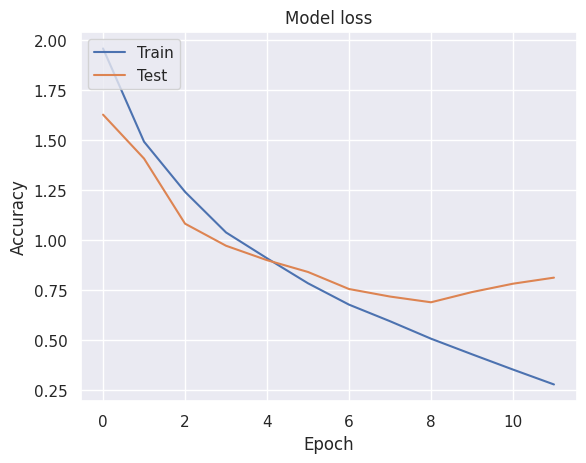

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
predictions = model.predict(X_val)

313/313 [==============================] - 91s 289ms/step


In [27]:
predictions = one_hot_encoder.inverse_transform(predictions)
y_val = one_hot_encoder.inverse_transform(y_val)

## Plot confusion matrix

In [28]:
cm = confusion_matrix(y_val, predictions)

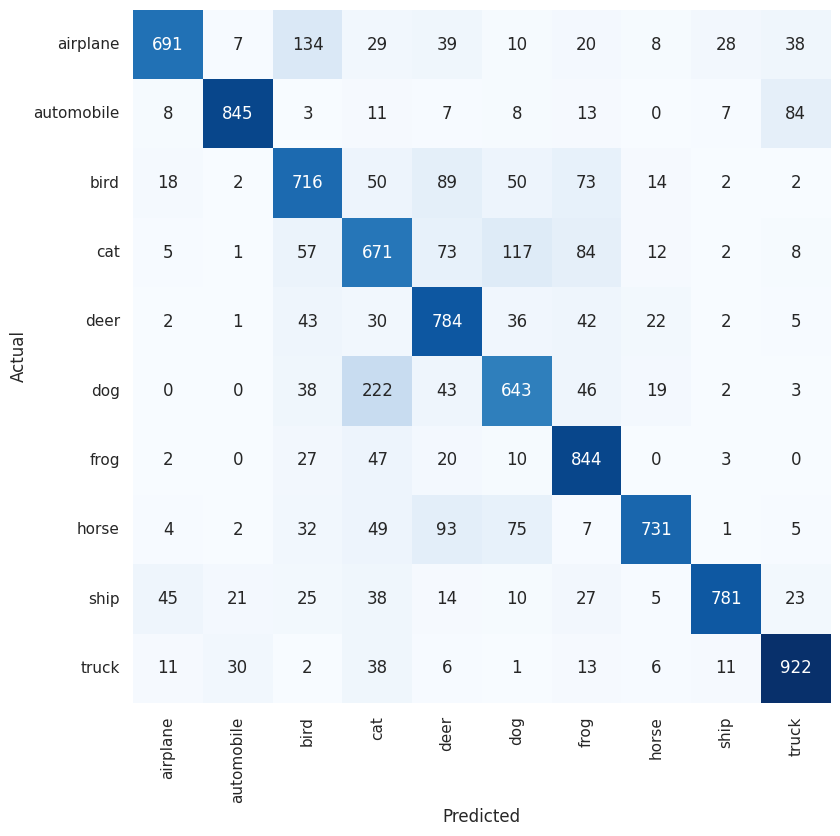

In [29]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Now check against the set-aside test set

In [30]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 91s 290ms/step - loss: 0.8339 - acc: 0.7598
Test accuracy: 0.7598000168800354


In [31]:
test_predictions = model.predict(X_test)

313/313 [==============================] - 92s 293ms/step


In [32]:
test_predictions = one_hot_encoder.inverse_transform(test_predictions)
y_test = one_hot_encoder.inverse_transform(y_test)

## Plot confusion matrix

In [33]:
cm = confusion_matrix(y_test, predictions)

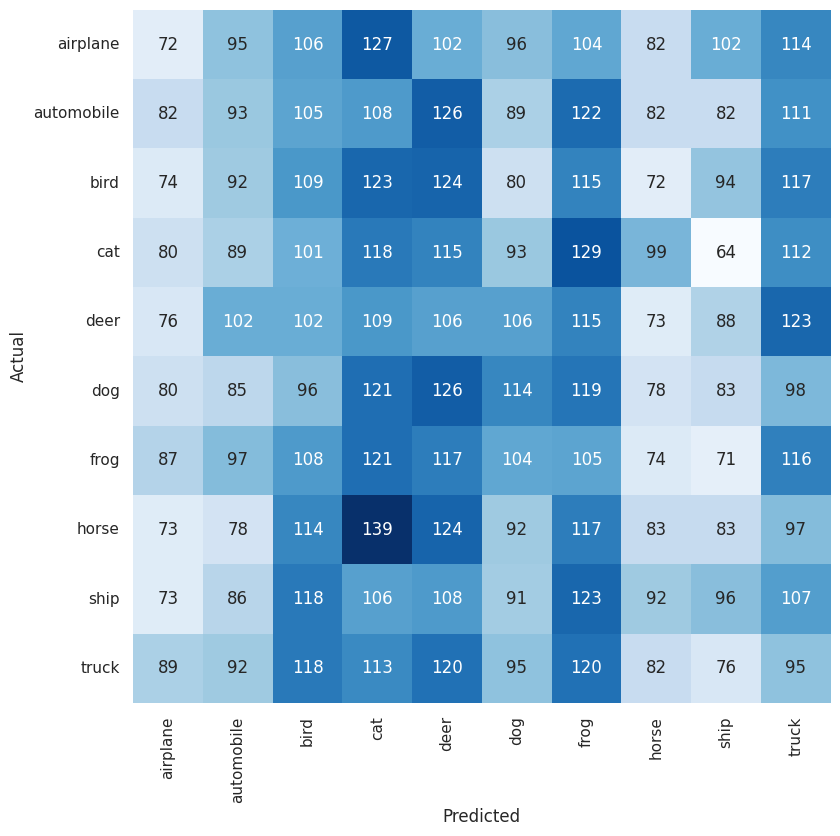

In [34]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()